In [ ]:
!pip install nltk
!pip install spacy
!python -m spacy download es_core_news_sm
!pip install -U imbalanced-learn
!pip install pyspellchecker

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Oculta warnings
import warnings
warnings.simplefilter('ignore')

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# CARGAR DATOS
**DATOS DE ENTRENAMIENTO**

la columna de trastornos indica si el TWEET es de una persona con depresión o es de control.


**control**:     0

**depresión**:   1

**ansiedad** :   2

In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /Data: A D C/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97543 entries, 0 to 97542
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     65054 non-null  object 
 1   TWEET_ID    64990 non-null  float64
 2   TWEET_TEXT  97479 non-null  object 
 3   trastorno   97543 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,47,2.147484e+09,RT @FraRocanroleras: Te estás destruyendo y lo...,1
1,6,2.147484e+09,No sé cómo estar sin ti pero tampoco sé cómo e...,0
2,NaN,NaN,Me pregunto por qué últimamente no me siento ...,2
3,NaN,NaN,Mi ansiedad en torno a toda esta enfermedad s...,2
4,NaN,NaN,Esto ha estado en mi mente bastante durante lo...,2
5,NaN,NaN,¿Necesitas algunas ideas? Este canal es maravi...,2
6,31,2.147484e+09,"Intenté decir algo pero no pude,sólo quedé con...",0
7,27,2.147484e+09,tumblrbot ha preguntado: ROBOTS OR DINOSAURS? ...,1
8,49,2.147484e+09,El smirnoff es la bebida mas traicionera que e...,1
9,36,2.147484e+09,¿Por qué mis primas son delgadas y tan hermosa...,0


#DATOS DE PRUEBA

In [ ]:
num_docs = 500

In [ ]:
ruta_archivo_entrenamiento = '/content/drive/MyDrive/Experimentación Python Tesis /Data: A D C/train.csv'
data_train = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data = pd.read_csv(ruta_archivo_entrenamiento, sep=',')
#data_train = data.iloc[:num_docs, :]
data_train.info()
data_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97543 entries, 0 to 97542
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     65054 non-null  object 
 1   TWEET_ID    64990 non-null  float64
 2   TWEET_TEXT  97479 non-null  object 
 3   trastorno   97543 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,47,2.147484e+09,RT @FraRocanroleras: Te estás destruyendo y lo...,1
1,6,2.147484e+09,No sé cómo estar sin ti pero tampoco sé cómo e...,0
2,NaN,NaN,Me pregunto por qué últimamente no me siento ...,2
3,NaN,NaN,Mi ansiedad en torno a toda esta enfermedad s...,2
4,NaN,NaN,Esto ha estado en mi mente bastante durante lo...,2
5,NaN,NaN,¿Necesitas algunas ideas? Este canal es maravi...,2
6,31,2.147484e+09,"Intenté decir algo pero no pude,sólo quedé con...",0
7,27,2.147484e+09,tumblrbot ha preguntado: ROBOTS OR DINOSAURS? ...,1
8,49,2.147484e+09,El smirnoff es la bebida mas traicionera que e...,1
9,36,2.147484e+09,¿Por qué mis primas son delgadas y tan hermosa...,0


In [ ]:
# Verificar si hay filas nulas o vacías en la columna 'TWEET_TEXT'
null_values = data_train['TWEET_TEXT'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'TWEET_TEXT':", null_values)

Número de filas nulas o vacías en la columna 'TWEET_TEXT': 64


In [ ]:
data_train.dropna(subset=['TWEET_TEXT'], inplace=True)

# Verificar si hay filas nulas o vacías en la columna 'TWEET_TEXT'
null_values = data_train['TWEET_TEXT'].isnull().sum()

# Imprimir el número de filas nulas o vacías
print("Número de filas nulas o vacías en la columna 'TWEET_TEXT':", null_values)
data_train.info()

Número de filas nulas o vacías en la columna 'TWEET_TEXT': 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 97479 entries, 0 to 97542
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     64990 non-null  object 
 1   TWEET_ID    64990 non-null  float64
 2   TWEET_TEXT  97479 non-null  object 
 3   trastorno   97479 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


# DATOS DE PRUEBA (TEST)

In [ ]:
num_docs_test = 5000

In [ ]:
ruta_archivo_prueba = '/content/drive/MyDrive/Experimentación Python Tesis /Data: A D C/train.csv'
data_test = pd.read_csv(ruta_archivo_prueba, lineterminator='\n')

data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97543 entries, 0 to 97542
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USER_ID     65054 non-null  object 
 1   TWEET_ID    64990 non-null  float64
 2   TWEET_TEXT  97479 non-null  object 
 3   trastorno   97543 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,47,2.147484e+09,RT @FraRocanroleras: Te estás destruyendo y lo...,1
1,6,2.147484e+09,No sé cómo estar sin ti pero tampoco sé cómo e...,0
2,NaN,NaN,Me pregunto por qué últimamente no me siento ...,2
3,NaN,NaN,Mi ansiedad en torno a toda esta enfermedad s...,2
4,NaN,NaN,Esto ha estado en mi mente bastante durante lo...,2


#Preprocesamiento de los datos

In [ ]:
import nltk
nltk.download('stopwords')  #Solamente se ha de descargar la primera vez.
stopwords_es = nltk.corpus.stopwords.words('spanish')   # Extrae las stopwords en español

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


*Eliminar etiquetas HTML*

In [ ]:
import re

def removeHTML(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, '', text)
        return cleantext
    else:
        return text  # Devolver el valor original si no es de tipo string

*Limpieza del texto*

In [ ]:
import re
import string

def clean(text):
    if isinstance(text, str):  # Verificar si es de tipo string
        # Eliminar hashtags
        text = re.sub(r'#\w+', '', text)

        # Eliminar URLs o enlaces
        text = re.sub(r'(https?://)?[a-zA-Z0-9]+\.[a-zA-Z0-9]+\S*', '', text)

        # Eliminar nombres de usuarios de Twitter
        text = re.sub(r'@\w+', '', text)

        # Eliminar Nombres propios
        text = re.sub(r'\b[A-Z][a-z]+\b', '', text)

        # Eliminar todos los caracteres especiales
        text = re.sub(r'[^\w\s]+', '', text)

        # Eliminar prefijos y números
        text = re.sub(r'\b\w{1,2}\b|\d+', '', text)

        # Eliminar palabras específicas
        specific_words = ['retweet', 'retweets', 'hashtag', 'trending', 'mención', 'enlace', 'emoji', 'timeline', 'interacciones',
                          'tuit', 'seguidores', 'notificaciones', 'seguir', 'favorito', 'perfil', 'tendencia', 'influencer',
                          'compartir', 'actualización', 'explorar', 'seguir', 'comunidad', 'contenido', 'popular',
                          'recomendar', 'experiencia', 'conectar', 'comentar', 'compartir', 'comunidad', 'actualización',
                          'drk', 'followers', 'stats', 'for', 'new', 'little', 'unfollower', 'unfollowers', 'today', 'shit','twitter','nombre',
                          'eric','story','great', 'short','squeeze','piggly','wiggly','hmv','even','follas','you','i','he','she',
                          'it','we','they','the','and','that','these','those','tweet','followed','follower']
        text = ' '.join([word for word in text.split() if word not in specific_words])

        # Eliminar emojis
        emojis = re.findall(r'[^\w\s,]', text)
        cleaned_emojis = [emoji for emoji in emojis if emoji not in ['@', '#', '/', '?','¿','.','…','"',':','“','!','¡','°','-',"‘",'’',
                                                                     '=',';','(',')',"'","'",'&','€','%','$','*','+','|', '”','🇦','🇷',',',
                                                                     ', ','—','«',' »','»','« ','[, ]','[,]',',',', ','',' ',' ♀',' 🏽']]
        for emoji in cleaned_emojis:
            text = text.replace(emoji, '')

        # Convertir el texto a minúsculas
        text = text.lower()

        # Eliminar signos de puntuación
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
        # Tokenizar el texto en palabras
        words = text.split()


        # Reconstruir el texto limpio
        text = ' '.join(words)

        # Devuelve el texto limpio
        return text
    else:
        return text  # Devolver el valor original si no es de tipo string

*lematizar y extraer términos*

In [ ]:
import pandas as pd
import spacy
from spacy.lang.es import Spanish
from nltk.corpus import stopwords


# Cargar modelo de spaCy
nlp = spacy.load("es_core_news_sm")

# Cargar stopwords en español
stopwords_es = set(stopwords.words('spanish'))
def extractTerms(text):
    if isinstance(text, str):
        # Tokenización y lematización con spaCy
        doc = nlp(text)
        lemmatized_terms = [token.lemma_ for token in doc if token.text.lower() not in stopwords_es]

        return lemmatized_terms
    else:
        return []  # Devolver una lista vacía si el texto no es una cadena de texto

# Ejemplo de uso
texto_ejemplo = "Los gatos están saltando sobre las vallas"
terminos_extraidos = extractTerms(texto_ejemplo)
print(terminos_extraidos)

['gato', 'saltar', 'valla']


# Preprocesamieto del conjunto de datos de entrenamiento

In [ ]:
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(removeHTML)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(clean)
data_train['TWEET_TEXT'] = data_train['TWEET_TEXT'].apply(extractTerms)
data_train.head(10)

,USER_ID,TWEET_ID,TWEET_TEXT,trastorno
0,47,2.147484e+09,"[destruir, único, hacer, reírte]",1
1,6,2.147484e+09,"[cómo, tampoco, cómo, tú]",0
2,NaN,NaN,"[pregunto, últimamente, sentir, tranquilo, pun...",2
3,NaN,NaN,"[ansiedad, torno, todo, enfermedad, disparado]",2
4,NaN,NaN,"[mente, bastante, último, mes, compañero, cuar...",2
5,NaN,NaN,"[idea, canal, maravilloso, aquí, historia, seg...",2
6,31,2.147484e+09,"[intentar, decir, pudesólo, quedé, nudo, garga...",0
7,27,2.147484e+09,"[tumblrbot, preguntado, robot, dinosaurs]",1
8,49,2.147484e+09,"[smirnoff, bebido, mas, traicionero, existir, ...",1
9,36,2.147484e+09,"[prima, delgado, tanto, hermosa, vida]",0


In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 5408


In [ ]:
# Filtrar filas donde 'TWEET_TEXT' no sea una lista vacía
data_train = data_train[data_train['TWEET_TEXT'].apply(len) > 0]

# Reiniciar el índice del DataFrame después de eliminar filas
data_train.reset_index(drop=True, inplace=True)

In [ ]:
# Verificar si hay elementos vacíos en la columna 'TWEET_TEXT'
empty_count = (data_train['TWEET_TEXT'].apply(len) == 0).sum()

# Imprimir el número de elementos vacíos en la columna 'TWEET_TEXT'
print("Número de elementos vacíos en la columna 'TWEET_TEXT':", empty_count)

Número de elementos vacíos en la columna 'TWEET_TEXT': 0


#Representación de los datos

La caracterización de texto mediente Embedding transforma cada palabra del contexto en un vector de embedding.



In [ ]:
import gensim
from gensim.models import Word2Vec
# Entrena un modelo Word2Vec usando CBOW
modelW = Word2Vec(data_train['TWEET_TEXT'], vector_size=300, window=5, min_count=1, sg=0)# - vector_size: el tamaño de los vectores de palabra
# - window: el tamaño de la ventana de contexto
# - min_count: el número mínimo de veces que una palabra debe aparecer para ser considerada
# - sg: 0 para CBOW, 1 para Skip-gram

# Obtener la representación vectorial de un documento promediando las palabras
def document_vector(tokens, modelW):
    # Filtrar palabras que no están en el modelo
    tokens = [token for token in tokens if token in modelW.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(modelW.vector_size)
    return np.mean([modelW.wv[token] for token in tokens], axis=0)

# Crear una matriz de características X utilizando las representaciones vectoriales de Word2Vec
X = [document_vector(tokens, modelW) for tokens in data_train['TWEET_TEXT']]

# Obtener las etiquetas y
y = data_train['trastorno'].values

# Ahora puedes usar X e y para entrenar tu modelo de clasificación como se mencionó anteriormente

In [ ]:
# Imprimimos el la longitud de las palabras totales
print(modelW)
print(len(modelW.wv))
# Observamos el vocabulario creado
words = modelW.wv.index_to_key
print(words)

In [ ]:
# Obtener la representación vectorial de una palabra específica
vector = modelW.wv['depresión', 'ansiedad']
vector

array([[-1.07420884e-01, -6.24438643e-01, -6.46424830e-01,
        -3.76832157e-01,  5.94510734e-01, -2.73155302e-01,
         5.95024109e-01,  5.64757466e-01,  5.88906050e-01,
        -4.60974485e-01,  6.81493282e-02, -2.94915438e-01,
         3.42462175e-02,  4.46043462e-01,  5.82647026e-01,
        -1.17531503e-02, -2.78107017e-01,  7.24464655e-01,
         3.60060453e-01,  4.90765423e-01,  2.34128479e-02,
        -2.21159279e-01,  3.36613029e-01, -7.80016482e-02,
         2.83602625e-01, -1.79891691e-01, -6.52948797e-01,
         1.24706197e+00,  3.00596654e-02, -5.41909814e-01,
         5.85619509e-01,  1.36117652e-01, -7.38550961e-01,
        -1.50778800e-01, -8.32340002e-01, -4.75904644e-02,
        -8.60677212e-02, -9.34100211e-01,  2.37464771e-01,
        -9.97816771e-02,  2.10771456e-01, -3.40598673e-01,
        -3.37489307e-01, -2.79249251e-01, -2.30897814e-01,
         6.76449955e-01, -8.14685673e-02,  6.94583476e-01,
         1.01581657e+00, -5.98538779e-02, -5.26071846e-0

# Aprensizaje del modelo: Red Neuronal
**Validación Cruzada K=10**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from imblearn.over_sampling import RandomOverSampler
from keras.utils import to_categorical

In [ ]:


# Supongamos que X es una lista de representaciones vectoriales Word2Vec y y son las etiquetas (0 o 1)
X = X  # Aquí, X ya contiene las representaciones vectoriales de Word2Vec
y = np.array(y)

# Realizar balanceo si es necesario (oversampling)
oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

# Ahora, X y y tienen el mismo número de muestras

# Convertir la lista de listas X_train en una matriz NumPy
X = np.array(X)

# Convertir las etiquetas en codificación one-hot
num_classes = 3  # Número de clases
y_one_hot = to_categorical(y, num_classes)

# Crear listas para almacenar las métricas de entrenamiento y validación
train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_list = []
val_accuracy_list = []
val_precision_list = []
val_recall_list = []
val_f1_list = []

# Realizar validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Puedes ajustar el número de divisiones según sea necesario

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train_one_hot, y_val_one_hot = y_one_hot[train_index], y_one_hot[val_index]

    # Crear una red neuronal secuencial
    model = Sequential()
    model.add(Dense(328, activation='relu', input_dim=X.shape[1]))
    model.add(Dropout(0.1))
    model.add(Dense(164, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=[CategoricalAccuracy()])

    # Entrenar el modelo en los datos de entrenamiento
    model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32)

    # Evaluar el modelo en el conjunto de entrenamiento
    y_train_pred = model.predict(X_train)
    y_train_pred_class = y_train_pred.argmax(axis=1)
    y_train_true_class = y_train_one_hot.argmax(axis=1)

    train_accuracy = accuracy_score(y_train_true_class, y_train_pred_class)
    train_precision = precision_score(y_train_true_class, y_train_pred_class, average='macro')
    train_recall = recall_score(y_train_true_class, y_train_pred_class, average='macro')
    train_f1 = f1_score(y_train_true_class, y_train_pred_class, average='macro')

    # Evaluar el modelo en el conjunto de validación
    y_val_pred = model.predict(X_val)
    y_val_pred_class = y_val_pred.argmax(axis=1)
    y_val_true_class = y_val_one_hot.argmax(axis=1)

    val_accuracy = accuracy_score(y_val_true_class, y_val_pred_class)
    val_precision = precision_score(y_val_true_class, y_val_pred_class, average='macro')
    val_recall = recall_score(y_val_true_class, y_val_pred_class, average='macro')
    val_f1 = f1_score(y_val_true_class, y_val_pred_class, average='macro')

    # Almacenar las métricas en las listas
    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_list.append(train_f1)
    val_accuracy_list.append(val_accuracy)
    val_precision_list.append(val_precision)
    val_recall_list.append(val_recall)
    val_f1_list.append(val_f1)

# Guardar el modelo entrenado
model.save('/content/drive/MyDrive/Experimentación Python Tesis /Experimento Dataset Ansiedad Depresión/Word2vec/parametros/parametro-word2vec.h5')

# Cargar el modelo entrenado
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Experimentación Python Tesis /Experimento Dataset Ansiedad Depresión/Word2vec/parametros/parametro-word2vec.h5')



Epoch 1/10
2427/2427 [==============================] - 11s 4ms/step - loss: 0.7283 - categorical_accuracy: 0.5919
Epoch 2/10
2427/2427 [==============================] - 10s 4ms/step - loss: 0.6954 - categorical_accuracy: 0.6000
Epoch 3/10
2427/2427 [==============================] - 9s 4ms/step - loss: 0.6834 - categorical_accuracy: 0.6055
Epoch 4/10
2427/2427 [==============================] - 10s 4ms/step - loss: 0.6769 - categorical_accuracy: 0.6037
Epoch 5/10
2427/2427 [==============================] - 10s 4ms/step - loss: 0.6706 - categorical_accuracy: 0.6074
Epoch 6/10
2427/2427 [==============================] - 12s 5ms/step - loss: 0.6670 - categorical_accuracy: 0.6092
Epoch 7/10
2427/2427 [==============================] - 12s 5ms/step - loss: 0.6626 - categorical_accuracy: 0.6112
Epoch 8/10
2427/2427 [==============================] - 10s 4ms/step - loss: 0.6596 - categorical_accuracy: 0.6082
Epoch 9/10
2427/2427 [==============================] - 9s 4ms/step - loss: 0.656

In [ ]:
# Imprimir
print("Métricas de entrenamiento - Accuracy:", np.mean(train_accuracy_list)*100)
print("Métricas de entrenamiento - Precision:", np.mean(train_precision_list)*100)
print("Métricas de entrenamiento - Recall:", np.mean(train_recall_list)*100)
print("Métricas de entrenamiento - F1-score:", np.mean(train_f1_list)*100)
print('--'*10)
print("Métricas de validación - Accuracy:", np.mean(val_accuracy_list)*100)
print("Métricas de validación - Precision:", np.mean(val_precision_list)*100)
print("Métricas de validación - Recall:", np.mean(val_recall_list)*100)
print("Métricas de validación - F1-score:", np.mean(val_f1_list)*100)

Métricas de entrenamiento - Accuracy: 61.853585249276335
Métricas de entrenamiento - Precision: 61.99138484928546
Métricas de entrenamiento - Recall: 61.853730489536105
Métricas de entrenamiento - F1-score: 57.92463439124912
--------------------
Métricas de validación - Accuracy: 60.810310843220115
Métricas de validación - Precision: 60.48542153354496
Métricas de validación - Recall: 60.80974977773168
Métricas de validación - F1-score: 56.81262299507448


#Matriz de confusión

entrenamiento

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_true_class, y_train_pred_class)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[16723  7919  1244]
 [16354  8304  1229]
 [ 1486  1189 23212]]


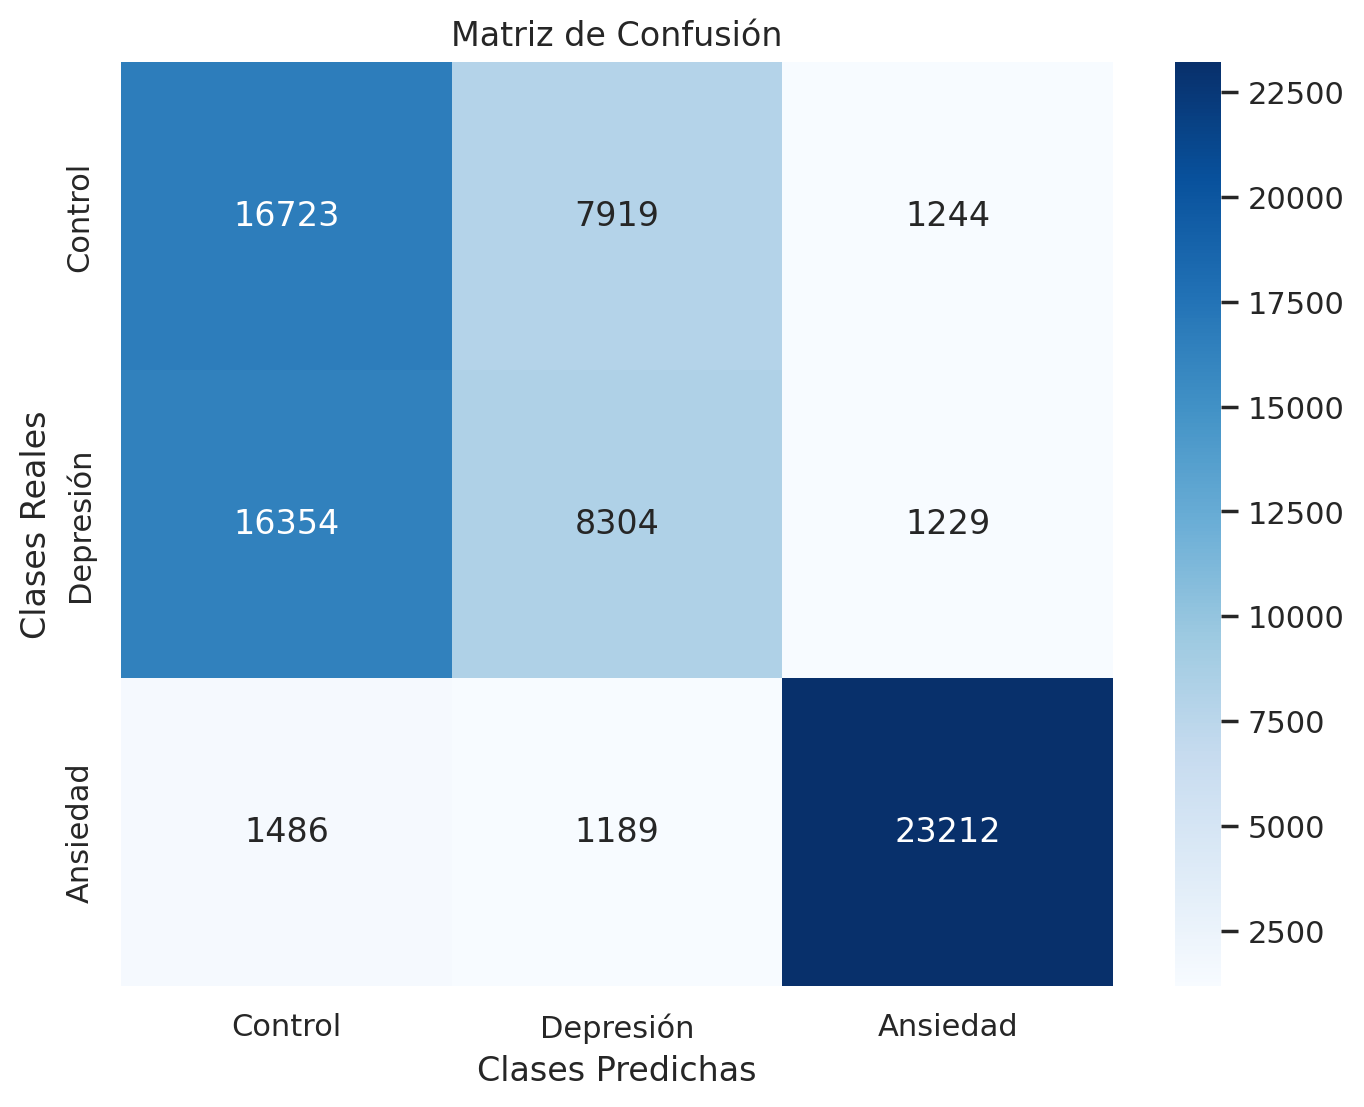

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas de las clases
classes = ['Control', 'Depresión', 'Ansiedad']

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Agregar etiquetas y título
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Reales')
plt.title('Matriz de Confusión')

plt.show()

validación

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val_true_class, y_val_pred_class)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[4053 2058  361]
 [4148 2006  317]
 [ 394  308 5769]]


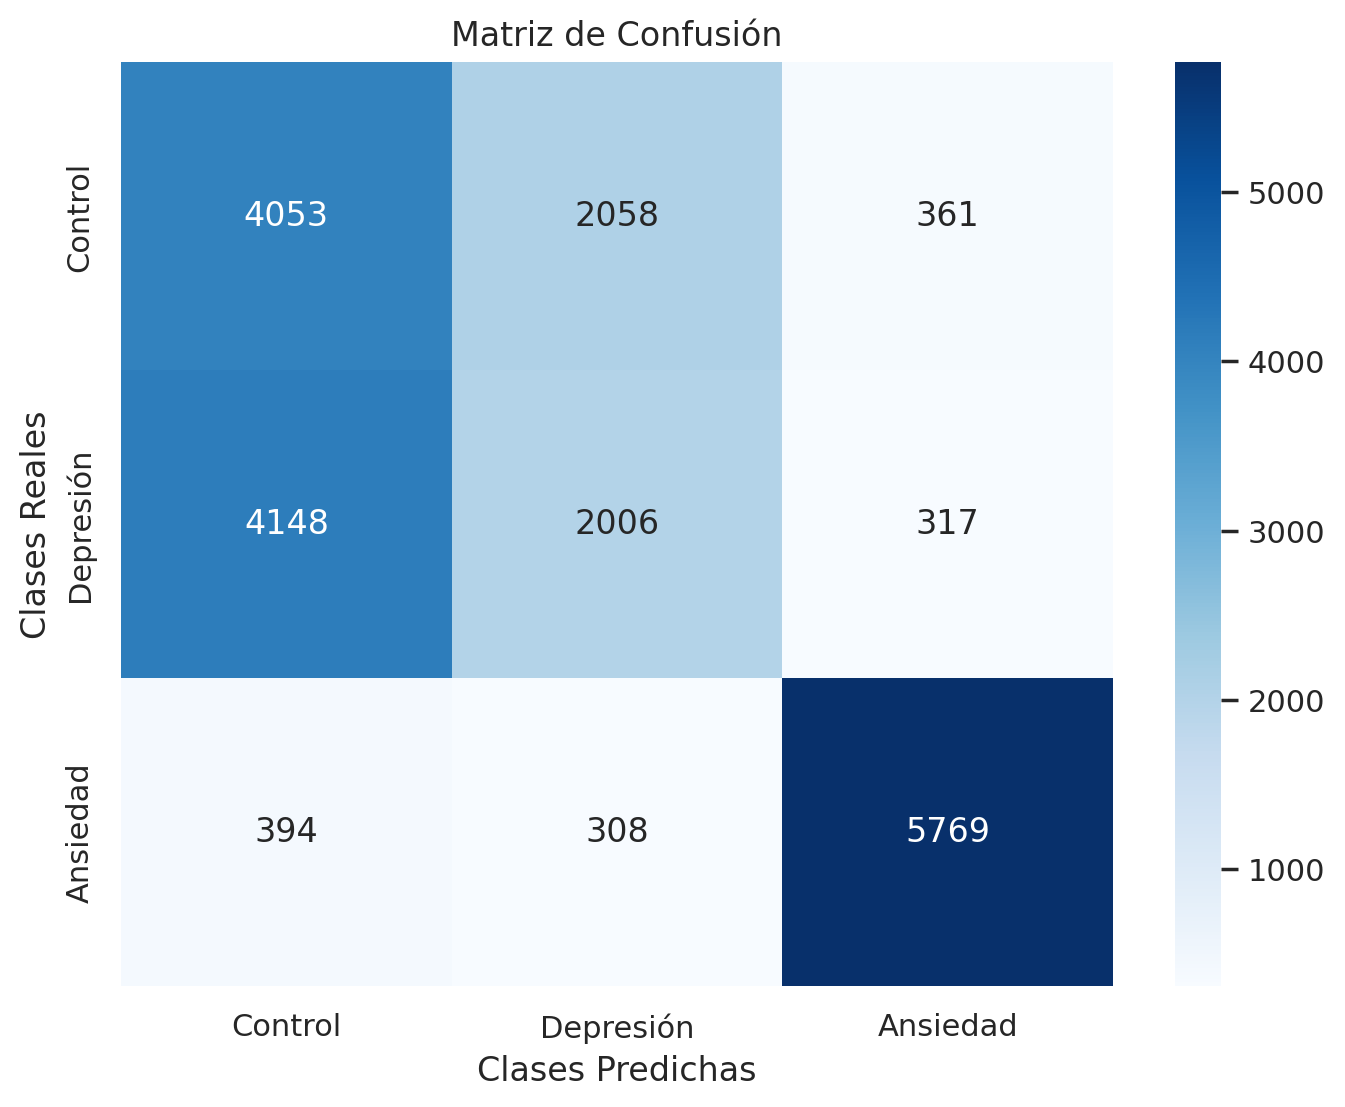

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir etiquetas de las clases
classes = ['Control', 'Depresión', 'Ansiedad']

# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Agregar etiquetas y título
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Reales')
plt.title('Matriz de Confusión')

plt.show()

# Guardar el modelo


In [ ]:
import joblib
import os
# Directorio para guardar modelos entrenados
model_dir = '/content/drive/MyDrive/Experimentación Python Tesis /Experimento Dataset Ansiedad Depresión/Word2vec/parametros'
model_filename = 'TWEETS_depresivos (RN-Word2Vec).pkl'
model_path_p = os.path.join(model_dir, model_filename)

# Guardar el modelo entrenado
joblib.dump(model, model_path_p)

['/content/drive/MyDrive/Experimentación Python Tesis /Experimento Dataset Ansiedad Depresión/Word2vec/parametros/TWEETS_depresivos (RN-Word2Vec).pkl']